## Tarea 4, parte 1: Seguimiento espectroscópico de candidatos a binarias eclipsantes 

Una binaria eclipsante en un sistema donde una de las estrellas transita en frente de la otra con respecto a un observador, por lo tanto, la inclinación de la órbita de la estrella debe estar restringida a un pequeño rango de valores de modo que podamos observar los efectos del eclipse desde la Tierra. En general, debido a que las dos estrellas no se pueden resolver separadamente, el eclipse se atribuye a variaciones fotométricas como variaciones de flujo, y por observaciones espectroscópicas como la superposición de espectros. 

Los estudios de estos sistemas son importantes porque permiten dar una buena estimación de las distancias a objetos extragalácticos (Andromeda, LMC, SMC, etc). También, facilitan la determinación del radio y de la masa de la estrella más masiva del sistema ([Bonanos 2006](https://arxiv.org/pdf/astro-ph/0610923v1.pdf), [Wraight et al. 2012](http://mnras.oxfordjournals.org/content/427/3/2298.full.pdf)). 

Para un buen estudio espectroscópico de estas binarias es necesario usar el principio del *echelle grating* el que permite una mayor resolución espectral y, por lo tanto, una mejor identificación de las líneas de absorción de las atmósferas de cada estrellas. Este tipo de espectrógrado recibe la luz de un primera red de difracción y la separa en distintos órdenes. Esto evita que se obtenga un espectro con superposición de distintas fuentes ([Michelson 1898](http://articles.adsabs.harvard.edu/cgi-bin/nph-iarticle_query?1898ApJ.....8...37M&amp;data_type=PDF_HIGH&amp;whole_paper=YES&amp;type=PRINTER&amp;filetype=.pdf)).




En el paper de Wraight et al. se presenta un algoritmo que mediante un ajuste por mínimos cuadrados logra ajustar un modelo a las curvas de luz observadas. Este modelo determina los mejores valores (best-fitting) para el periodo, la variabilidad y la profundidad de esta para cada curva de luz analizada.

De los 9 candidatos 2 ya han sido confirmados como binarias eclipsantes: HD75767 y HD213597. A continuación analizaremos los otros 7 candidatos. 

### Gráficos de visibilidad

In [1]:
import ephem
import numpy as np
import math as mt
import matplotlib.pyplot as plt
import itertools
from astropy import units as u
from astropy.coordinates import SkyCoord
% matplotlib inline

In [2]:
gatech = ephem.Observer()
gatech.lon, gatech.lat = '-70.64822', '-33.45694'
gatech.elevation = 1450

obj1 = ephem.readdb("HD23765,f|V|F8,3:48:28.92,21:47:50.99,9.53,2000")      # HD23765   
obj2 = ephem.readdb("HD287039,f|V|F8,4:46:19.65,12:44:41.28,9.88,2000")     # HD287039  
obj3 = ephem.readdb("HD89849,f|V|F8,10:22:9.84,6:13:5.84,9.15,2000")        # HD89849   
obj4 = ephem.readdb("HD198044,f|V|F7,20:48:21.84,-22:-44:-26.52,7.2,2000")  # HD198044  
obj5 = ephem.readdb("BD073648,f|V|,13:34:54.48,-8:-26:-32.892,11.3,2000")   # BD073648  
obj6 = ephem.readdb("HD205403,f|V|F5,21:35:3.84,-3:-44:-5.64,8.02,2000")    # HD205403  
obj7 = ephem.readdb("HD222891,f|V|F8,23:44:38.88,-8:-50:-55.64,8.07,2000")  # HD222891 
objs = [obj1, obj2, obj3, obj4, obj5, obj6, obj7]   

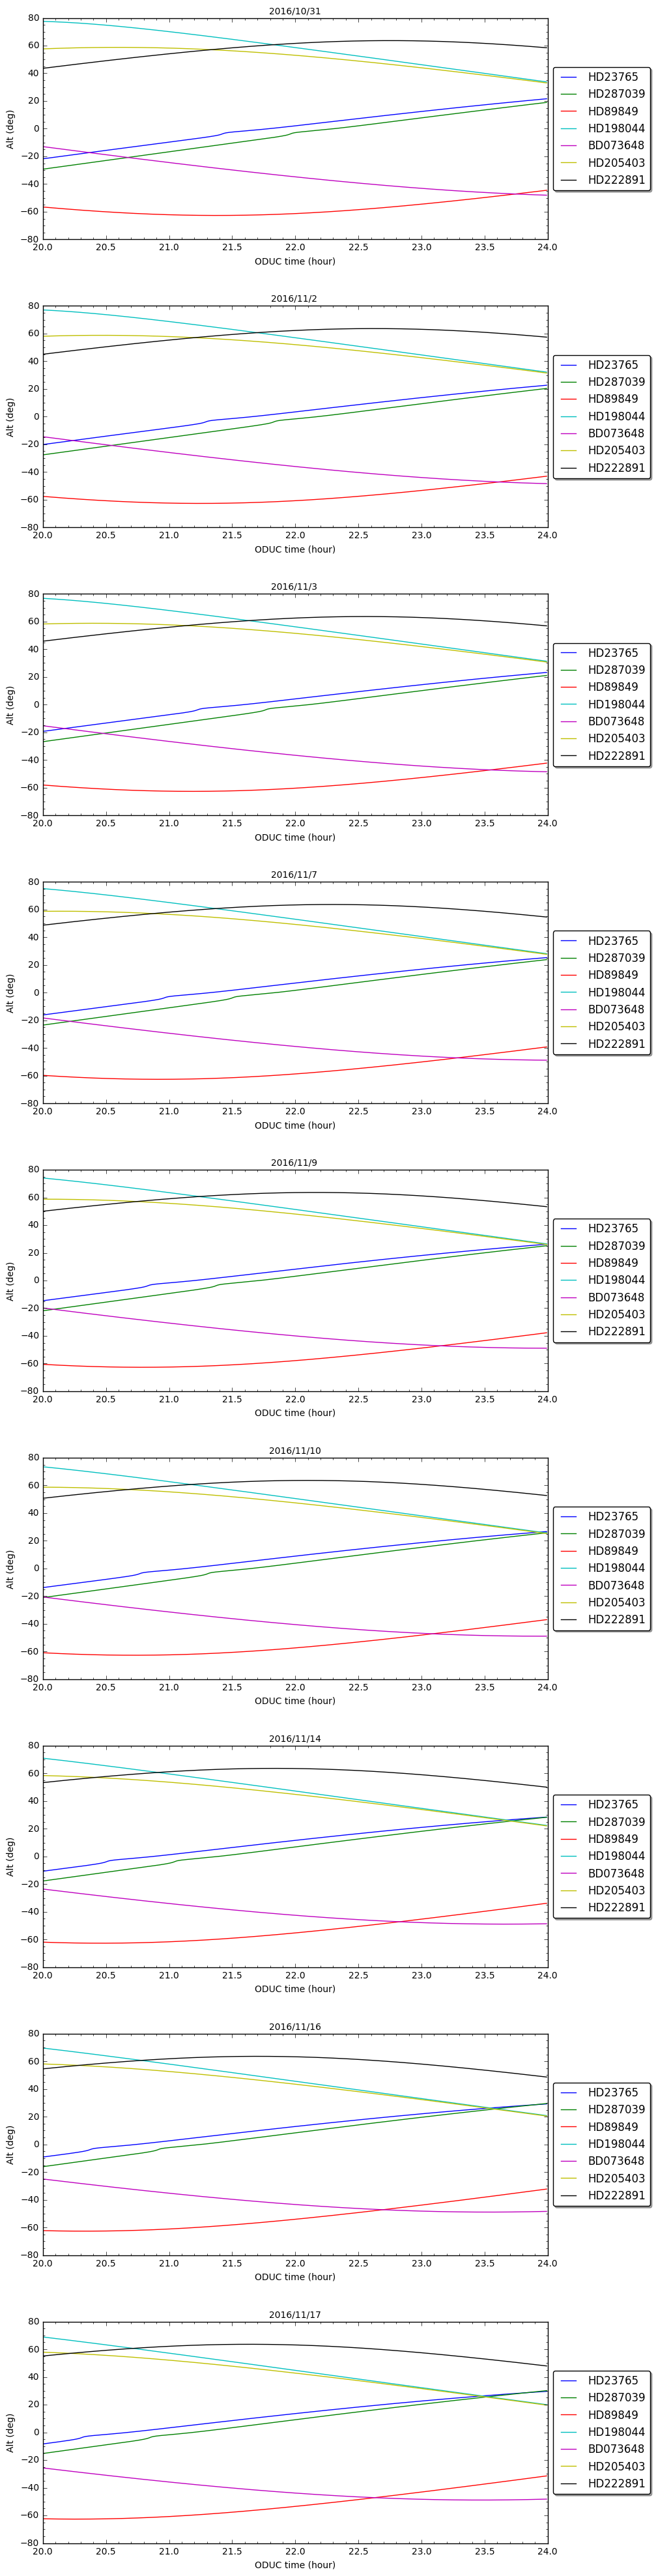

In [3]:
day_list = ['2016/10/31 23:00:00', '2016/11/2 23:00:00', '2016/11/3 23:00:00',
            '2016/11/7 23:00:00', '2016/11/9 23:00:00', '2016/11/10 23:00:00',
            '2016/11/14 23:00:00', '2016/11/16 23:00:00', '2016/11/17 23:00:00']

names = ['HD23765', 'HD287039', 'HD89849', 'HD198044','BD073648', 'HD205403','HD222891']
rr = ['b','g','r','c','m','y','k']
l,i = 4,0
n = l*3600/30
alt = []
time = []

f, ax = plt.subplots(nrows = 9, figsize = [10,50])

for day,a in zip(day_list, ax):
    for ob, title, color in itertools.izip(objs, names,rr):
        
        gatech.date = day
        t = ephem.Date(gatech.date)
        
        while i < n:
        
            ob.compute(gatech)
            alt.append(mt.degrees(float(ob.alt)))
            h = ephem.localtime(t).hour
            m = (ephem.localtime(t).minute)/60.
            s = (ephem.localtime(t).second)/3600.
   
            time.append(h + m + s)
            gatech.date += 30 * ephem.second 
            t = ephem.Date(gatech.date)
            i += 1
            
        alt_np = np.array(alt)
        time_np = np.array(time)
        
        a.plot(time_np, alt_np, color = color, label = title)
        time, alt, i= [], [], 0
    
    box = a.get_position()    
    a.set_position([box.x0, box.y0, box.width * 0.8, box.height])    
    a.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol = 1, fancybox=True, shadow=True)
    a.set_xlabel('ODUC time (hour)', fontsize = 10)
    a.set_ylabel('Alt (deg)', fontsize = 10)
    a.set_title(day[:10], fontsize = 10)
    a.minorticks_on()    
    f.subplots_adjust(hspace=.3)

Como podemos ver los mejores candidatos para observación son HD1984044, HD205403 y HD222891. A continuación, nos efocaremos en estos EBs. 

### Determinando las fechas de cuadratura

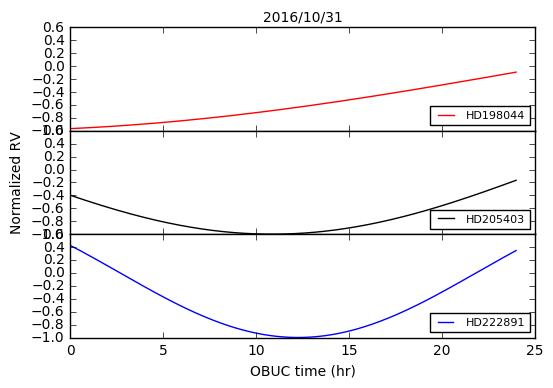

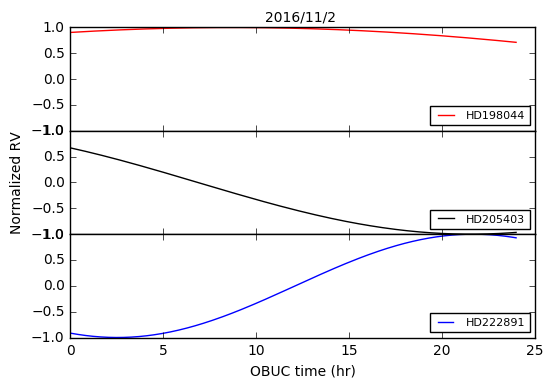

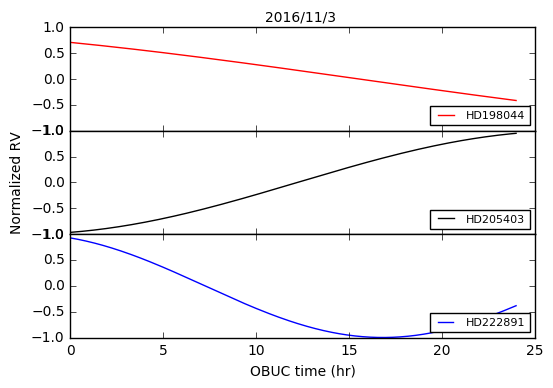

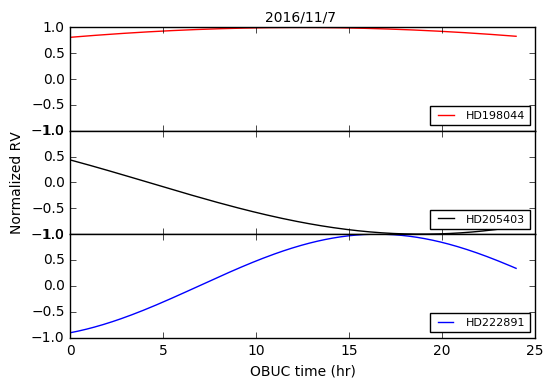

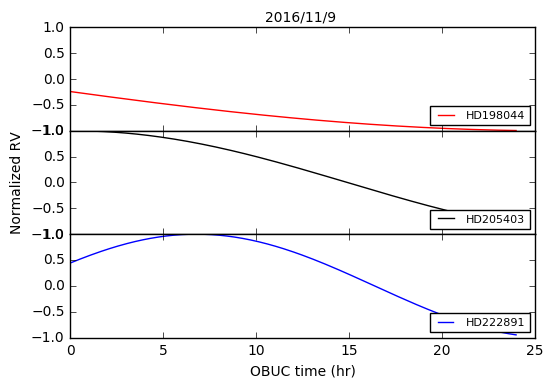

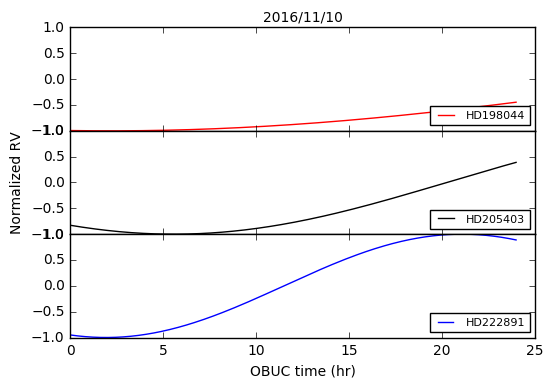

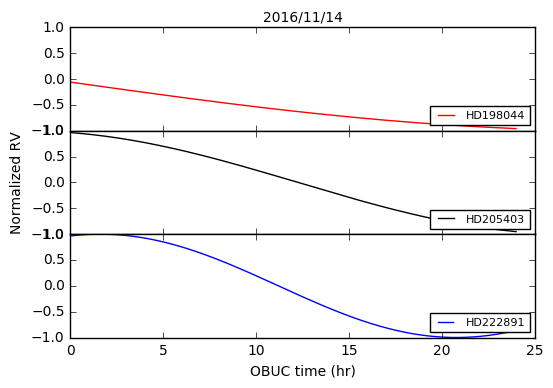

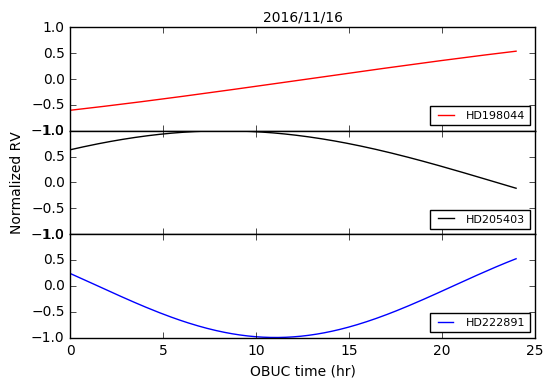

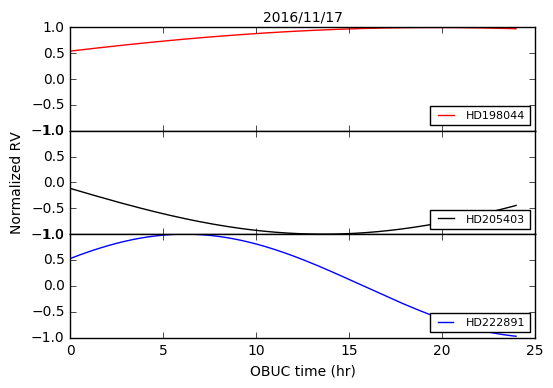

In [4]:
day_list = ['2016/10/31 3:00:00', '2016/11/2 3:00:00', '2016/11/3 3:00:00',
            '2016/11/7 3:00:00', '2016/11/9 3:00:00', '2016/11/10 3:00:00',
            '2016/11/14 3:00:00', '2016/11/16 3:00:00', '2016/11/17 3:00:00']

stars = ['HD198044', 'HD205403', 'HD222891']

def localtime (DJD_array,day):
    time = []
    d = ephem.Date(day)
    i = 0
    while i < len(DJD_array):
        h = ephem.localtime(d).hour
        m = (ephem.localtime(d).minute)/60.
        s = (ephem.localtime(d).second)/3600.
        time.append(h+m+s)
        d = ephem.Date(d + 0.001)
        i += 1
    return np.array(time)    

# HD198044, HD205403, HD222891
MJDs = [54550.509489, 54123.63481, 54150.650434]
periods = [5.15195, 2.4449, 1.59495]
rr = ['red', 'black', 'blue']

for day in day_list:
    f, ax = plt.subplots(3, sharex=True, sharey=True) 
    
    for MJD, p, legend, color, a in itertools.izip(MJDs, periods, stars, rr, ax):
        
        DJD = MJD - 15019.5       # Momento del eclipse (Dublin Julian Day)
        d_act = ephem.Date(day)   # Día de interés     
        
        h = ephem.localtime(d_act).hour
        m = (ephem.localtime(d_act).minute)/60.
        s = (ephem.localtime(d_act).second)/3600.
        t = h + m +s
        
        time = np.arange(float(d_act), float(d_act) + 1, 0.001)
        
        b = (2*np.pi/p)
        phi = -1*DJD*b
        
        local_time = localtime(time, day)
        RV = np.sin(b * time + phi)
        
        a.plot(local_time, RV, color=color, label = legend)
        a.legend(loc=4,prop={'size':8})
        
    ax[2].set_xlabel('OBUC time (hr)')
    ax[1].set_ylabel('Normalized RV')
    ax[0].set_title(day[:10], fontsize = 10)
    f.subplots_adjust(hspace=0)
    plt.setp([a.get_xticklabels() for a in f.axes[:-1]], visible=False)

Notar que hemos asumido un excentricidad nula (lo que se traduce en curvas de velocidad sinusoidales). Esta suposición es válida porque las orbitas de las binarias tienden a hacerce circulares de manera natural debido a las fuertes interacciones de marea, lo que ocurre en escalas de tiempo cortas comparadas con el tiempo de vida de las estrellas. 

### Función de masa para binarias

La función de masas de binarias (para $e =0$) está dada por el lado izquierda la siguiente ecuación (*An Introduction to Modern Astrophysics*, Carrol & Ostlie) 

$$\frac{m_2^3}{(m_1 + m_2)^2} \sin^3 i = \frac{P}{2\pi G} v_{1r}^3$$

Donde los subíndices 1 y 2 se refieren a las estrellas primaria y secundaria respectivamente, P es el periodo y $v_{1r}$ la amplitud de las variaciones de velocidad radial. 

Ajustaremos las masas $m_1$ de cada estrellas utilizando el tipo espectral de cada una (y considerando que se encuentran en la secuencia principal) ([Tabla](http://www.uni.edu/morgans/astro/course/Notes/section2/spectralmasses.html)). Además de esta aproximación, consideraremos que el plano de las orbitas se encuentra sobre la línea de visión ($i = 90$). 

En el siguiente bloque se mostrará la variación de amplitud de las velocidades radiales dependiendo de la masa de la estrella secundaria. En el paper de Wraight et al., se afirma que lo más probable es que estas estrellas correspondan a tipos espectrales K o M, por lo que ajustamos un rango de masas entre 0.17 y 0.76 masas solares (usando la misma tabla). 


(0.17, 0.76)

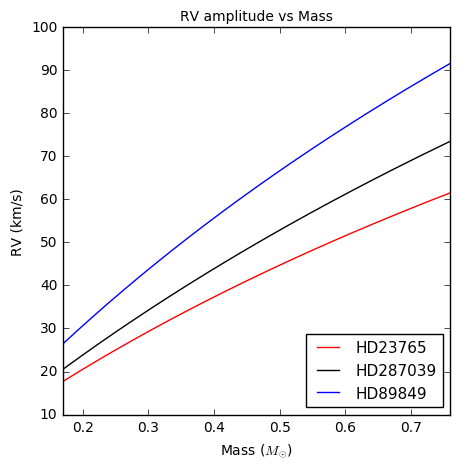

In [5]:
G = 6.674e-11                              # N m^2 / kg^2
Msun = 1.9891e30                           # Masa del Sol (kg)
i = np.pi/2     

# HD198044, HD205403 y HD222891
M_host = [1.12, 1.33, 1.10]                              # Masas de las estrellas principales (en masas solares)
M_comp = np.arange(0.17, 0.76, 0.001) * Msun             # Masas de las estrellas secundarias

f, ax = plt.subplots(1, figsize = [5,5])
ax.set_title('RV amplitude vs Mass', fontsize = 10)
ax.set_ylabel('RV (km/s)', fontsize = 10)
ax.set_xlabel('Mass ($M_{\odot}$)', fontsize = 10)

for p,color,legend, M in itertools.izip(periods, rr, names, M_host):
    
    M *= Msun
    p *= 86400
    f = ((M_comp * np.sin(i))**3) / ((M + M_comp)**2)
    V = ( (2*np.pi*G/p) * f)**(1./3)
    
    ax.plot(M_comp/Msun, V/1000, color=color, label=legend)
    ax.legend(loc=4,prop={'size':8})
ax.legend(loc=4,prop={'size':11})
ax.set_xlim(0.17, 0.76)

Para los 3 sistemas se observa que, aún para masas pequeñas, las variaciones de velocidad radial no son inferiores a 20 km/s. Para comprobar si es posible observar estas variaciones con PUCHEROS debemos analizar su poder de resolución, el cual es de ~18000 ([Vanzi et al.](http://mnras.oxfordjournals.org/content/424/4/2770.full.pdf)). Por lo tanto, la menor variación de velocidad que se puede captar, por efecto Doppler, está dado por $V = c/R$ donde $c$ es la velocidad de la luz  y $R$ el poder de resolución. Así, reemplazando las constantes obtenemos $V = 16.6$ km/s lo que es inferior a todas las amplitudes de RVs encontradas anteriormente. 

### Determinando los tiempos de exposición

La señal de una fuente escala como
$$S \propto t \cdot 10^{-0.4 V}$$
Y si consideramos que la señal corresponde principalmente a fotones entonces la muestra corresponde a una distribución de Poisson. Por lo tanto, el ruido viene dado por $N = \sqrt {S}$. Así,

$$\frac{S}{N} \propto \sqrt{t} \cdot 10^{-0.2V}$$

Por otro lado sabemos que para obtener una precisión de 10 m/s para una estrella con V=3.5 se necesitan 300 segundos. Usando este dato podemos determinar el tiempo de exposición necesario para obtener la misma señal a ruido que se obtendría en la situación anterior. Es decir, 

$$1 = \frac{10^{-0.2 \cdot 3.5}}{10^{-0.2 \cdot V}} \frac{\sqrt{300}}{\sqrt{t}}$$

El lado izquierdo es igual a 1 ya que queremos el mismo S/N y $V$ es la magnitud de la estrella de la que queremos calcular el tiempo de exposición $t$. De esta manera, determinamos el tiempo de exposición para una estrella de magnitud V y una precisión de 10 m/s. Sin embargo, queremos una precisión de 100 m/s, por lo que el tiempo de exposición necesario es menor (ya que la precisión es inversamente proporcional al S/N). En base a esto, podemos relacionar los tiempos de exposición con las precisiones mediante la siguiente ecuación

$$\frac{p_1}{p_2} = \frac{t_1^{-1/2}}{t_2^{-1/2}}$$

In [6]:
stars = {'HD198044': 7.2, 'HD205403': 8.02, 'HD222891': 8.07}
print "Tiempos de exposición\n"
for name, V in stars.items():
    t = 300 * 10**(0.4*(V-3.5))
    t = ((1./10) * np.sqrt(t))**2
    print "%s: %.2fs" % (name, t)

Tiempos de exposición

HD222891: 201.89s
HD205403: 192.81s
HD198044: 90.60s
